In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns',30)
dados = load_breast_cancer()

x = pd.DataFrame(dados.data, columns=[dados.feature_names])
y = pd.Series(dados.target)

In [2]:
x.head()
print(x.shape, y.shape)

(569, 30) (569,)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#separando em dados de treino e dados de teste:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=9)

#criando modelo
modelo = LogisticRegression(C=100, penalty='l2')
modelo.fit(x_treino, y_treino)

#score
resultado = modelo.score(x_teste, y_teste)
print("Acurácia = ", resultado)

Acurácia =  0.9590643274853801


C:\Users\jose-\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [6]:
previsoes = modelo.predict_proba(x_teste)
print(previsoes)

[[6.12679348e-02 9.38732065e-01]
 [4.66925141e-01 5.33074859e-01]
 [1.00000000e+00 7.44227514e-12]
 [1.84009270e-02 9.81599073e-01]
 [7.83059819e-04 9.99216940e-01]
 [1.00000000e+00 1.21372088e-13]
 [1.00000000e+00 5.26332426e-13]
 [9.99999839e-01 1.61261221e-07]
 [8.83167929e-03 9.91168321e-01]
 [9.99990095e-01 9.90492690e-06]
 [1.00000000e+00 8.37410966e-11]
 [3.81396888e-03 9.96186031e-01]
 [3.58903180e-04 9.99641097e-01]
 [1.54509159e-03 9.98454908e-01]
 [9.89439921e-01 1.05600793e-02]
 [4.29427549e-02 9.57057245e-01]
 [1.54307665e-04 9.99845692e-01]
 [2.41516557e-02 9.75848344e-01]
 [2.69720337e-05 9.99973028e-01]
 [2.08360342e-04 9.99791640e-01]
 [1.00000000e+00 1.35601283e-30]
 [2.91374481e-04 9.99708626e-01]
 [3.51170807e-03 9.96488292e-01]
 [9.99998995e-01 1.00532623e-06]
 [3.40978429e-03 9.96590216e-01]
 [1.01355775e-02 9.89864423e-01]
 [4.44763784e-02 9.55523622e-01]
 [2.13734368e-04 9.99786266e-01]
 [2.20284758e-03 9.97797152e-01]
 [9.99999999e-01 7.17269723e-10]
 [1.000000

In [24]:
probs = previsoes[:,1]#usando somente a segunda coluna

In [25]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_teste, probs)

In [26]:
print('TPR: ',tpr)
print('FPR: ',fpr)
print('THRESHOLDS: ',thresholds)

TPR:  [0.         0.00917431 0.82568807 0.82568807 0.91743119 0.91743119
 0.97247706 0.97247706 0.98165138 0.98165138 0.99082569 0.99082569
 1.         1.        ]
FPR:  [0.         0.         0.         0.01612903 0.01612903 0.03225806
 0.03225806 0.08064516 0.08064516 0.09677419 0.09677419 0.20967742
 0.20967742 1.        ]
THRESHOLDS:  [1.99999617e+00 9.99996171e-01 9.81599073e-01 9.77705892e-01
 9.55523622e-01 9.38732065e-01 7.71913282e-01 4.90811766e-01
 4.79617814e-01 3.91854641e-01 3.28471105e-01 5.94623623e-02
 5.69325536e-02 3.42469378e-37]


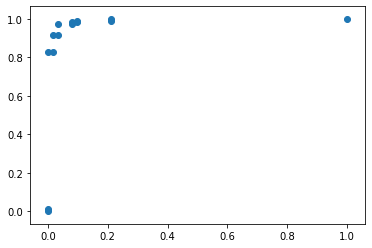

In [27]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.show()